In [55]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import numpy as np
from numpy.linalg import norm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

In [56]:
df = pd.read_csv('dataset.csv')
df.head(5)
#dealing with categorical data. One hot encoding would work here too


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['sex'], prefix = "sex")
e = pd.get_dummies(df['restecg'], prefix = "restecg")

frames = [df, a, b, c, d, e]
df = pd.concat(frames, axis = 1)

df_copy = df.drop(columns = ['cp', 'thal', 'slope', 'sex', 'restecg'])
df_copy.head()


,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_0,...,thal_2,thal_3,slope_0,slope_1,slope_2,sex_0,sex_1,restecg_0,restecg_1,restecg_2
0,63,145,233,1,150,0,2.3,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,37,130,250,0,187,0,3.5,0,1,0,...,1,0,1,0,0,0,1,0,1,0
2,41,130,204,0,172,0,1.4,0,1,0,...,1,0,0,0,1,1,0,1,0,0
3,56,120,236,0,178,0,0.8,0,1,0,...,1,0,0,0,1,0,1,0,1,0
4,57,120,354,0,163,1,0.6,0,1,1,...,1,0,0,0,1,1,0,0,1,0


In [58]:
#very important to drop the target if it is present
df_drop = df.drop(columns = ['target'])
df_drop.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_2,thal_3,slope_0,slope_1,slope_2,sex_0,sex_1,restecg_0,restecg_1,restecg_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,0,0,1,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0,1,0,0,0,1,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,1,1,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,1,0,1,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,0,0,1,1,0,0,1,0


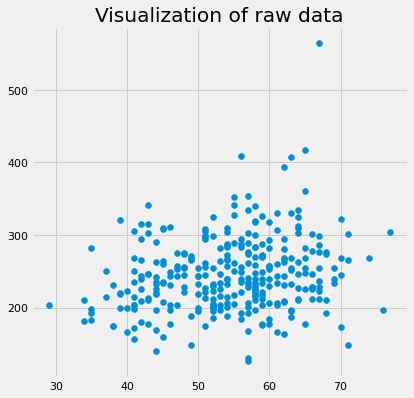

In [59]:
# Plot the data
plt.figure(figsize=(6, 6))
features = ['age',	'sex',	'trestbps',	'chol',	'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0',	'slope_1', 'slope_2',	'cp_0',	'cp_1',	'cp_2',	'cp_3',	'thal_0',	'thal_1',	'thal_2',	'thal_3', 'slope_0', 'slope_1', 'slope_2']
X = df_copy['age']
y = df_copy['chol']
plt.scatter(X, y)
plt.xlabel('')
plt.ylabel('')
plt.title('Visualization of raw data');


In [60]:
#use a subset of the data to start k-means exploration
data = df_copy[['age', 'chol']]
data.shape

(303, 2)

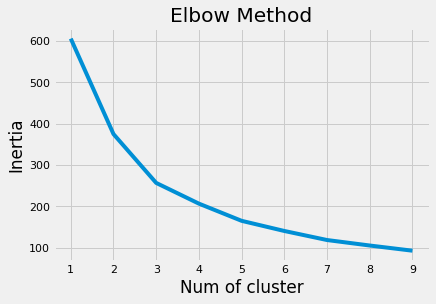

In [61]:
#uses sklearn kMeans
# Standardize the the small data set
X_std = StandardScaler().fit_transform(data)

#use elbow graph to see how many clusters might work
elbow = []
for i in range(1,10):
    km = KMeans(n_clusters = i, max_iter = 20, random_state = 42)
    km.fit(X_std)
    elbow.append(km.inertia_)

#Plot cluster
plt.plot(range(1,10), elbow)
plt.xlabel('Num of cluster')
plt.title('Elbow Method')
plt.ylabel('Inertia')
plt.show()


In [62]:
# Run sklearn KMeans: on samll data set here

km = KMeans(n_clusters=3, max_iter=500, random_state = 42)
km.fit(X_std)

KMeans(max_iter=500, n_clusters=3, random_state=42)

In [63]:
centroids = km.cluster_centers_
centroids

array([[ 0.57406348,  1.12796899],
       [-1.15211421, -0.30406765],
       [ 0.56294192, -0.54069438]])

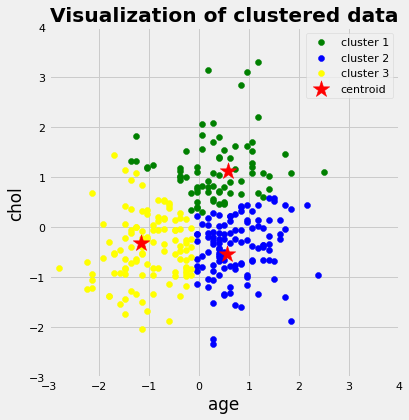

In [64]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[labels_ == 0, 0], X_std[labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[labels_ == 1, 0], X_std[labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(X_std[labels_ == 2, 0], X_std[labels_ == 2, 1],
            c='yellow', label='cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [65]:
data['cluster'] = km.labels_
data.head(5)
data.describe()

,age,chol,cluster
count,303.000000,303.000000,303.000000
mean,54.366337,246.264026,1.115512
std,9.082101,51.830751,0.811664
min,29.000000,126.000000,0.000000
25%,47.500000,211.000000,0.000000
50%,55.000000,240.000000,1.000000
75%,61.000000,274.500000,2.000000
max,77.000000,564.000000,2.000000


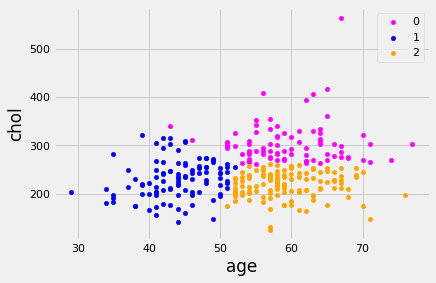

In [66]:
fig, ax = plt.subplots()
colors = {0:'magenta', 1:'blue', 2:'orange', 3:'red', 4:'pink', 5:'yellow', 6:'purple', 7:'black', 8:'green'}
grouped = data.groupby('cluster')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='chol', label=key, color=colors[key])
plt.show()

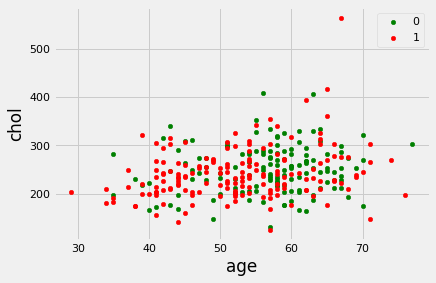

In [67]:
# diagnosis of heart disease (angiographic disease status)
# -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing

#check out the same data on the whole dataset that we have preped showing the target

fig, ax = plt.subplots()
colors = {0:'green', 1:'red'}
groups = df_copy.groupby('target')
for key, item in groups:
    item.plot(ax=ax, kind='scatter', x='age', y='chol', label=key, color=colors[key])
plt.show()

In [68]:
# features = ['age',	'trestbps',	'chol', 
#             'thalach', 'exang', 'oldpeak', 'ca', 'cp_0', 
#             'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 
#             'thal_3', 'slope_0',	'slope_1', 'slope_2', 'sex_0', 'sex_1', 'restecg_0', 
#             'restecg_1', 'restecg_2']

In [69]:
X = df_copy
X = df_copy.drop(columns = ['target', 'fbs'])

X.shape

(303, 23)

In [70]:
#standardize X
X_std4 = StandardScaler().fit_transform(X)
X_std4

array([[ 0.9521966 ,  0.76395577, -0.25633371, ...,  1.03015751,
        -1.00330579, -0.11566299],
       [-1.91531289, -0.09273778,  0.07219949, ..., -0.97072534,
         0.9967051 , -0.11566299],
       [-1.47415758, -0.09273778, -0.81677269, ...,  1.03015751,
        -1.00330579, -0.11566299],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ..., -0.97072534,
         0.9967051 , -0.11566299],
       [ 0.29046364, -0.09273778, -2.2275329 , ..., -0.97072534,
         0.9967051 , -0.11566299],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  1.03015751,
        -1.00330579, -0.11566299]])

In [71]:
#pca data to deal with categorical stuff using X_std4 already scaled
from sklearn.decomposition import PCA
std_pca = StandardScaler().fit_transform(X)

Z = std_pca

# Perform PCA
pca = PCA(17)
pca.fit(Z)
transformed_data = pca.transform(Z)
transformed_data

array([[-1.62112536, -0.12095947,  2.82656366, ..., -1.88492586,
         0.2996017 ,  0.65685634],
       [ 1.27428504, -1.12910123, -0.29545932, ...,  1.50073412,
        -0.6175843 ,  0.00723903],
       [ 2.8378528 ,  1.18818343,  1.25930517, ...,  0.16168342,
         0.75113694, -1.29899997],
       ...,
       [-2.81678637, -0.95989108, -1.52929975, ...,  0.35434812,
        -1.4332154 , -0.65046448],
       [-2.64128428, -1.72022332, -2.05344669, ..., -0.20106437,
         0.29418351,  0.31721672],
       [ 1.49524766,  2.33295678,  0.68369835, ...,  0.31574419,
         0.15500249,  0.92701527]])

In [72]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

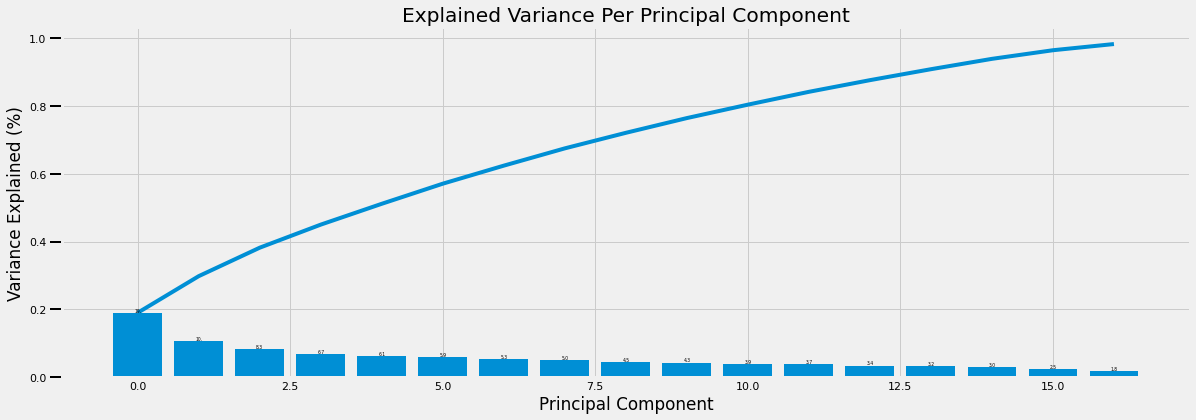

In [73]:
scree_plot(pca)#find where the variance is highest

In [74]:
# K-Means on PCA data
kmeanspca = KMeans(n_clusters=3, max_iter=1000, n_init=500, random_state=42)
kmeanspca.fit(transformed_data)
print(kmeanspca.labels_)
centroidspca = kmeanspca.cluster_centers_
centroidspca

[1 0 2 0 2 1 2 0 0 0 0 2 0 1 2 2 2 2 0 2 1 0 0 1 0 2 0 0 2 0 2 0 0 0 0 2 2
 0 2 2 2 0 1 2 0 0 0 0 2 2 2 1 1 2 2 0 0 0 0 2 2 0 1 0 0 2 0 2 0 2 1 0 0 0
 2 2 0 0 0 1 0 0 2 1 2 2 0 0 2 2 0 0 0 2 2 1 2 0 0 0 0 1 2 0 0 2 1 2 2 2 2
 0 2 0 0 2 0 1 2 2 2 0 2 2 2 2 0 2 2 2 2 2 0 0 2 2 2 0 1 1 2 0 2 2 2 0 2 2
 0 0 1 2 1 2 2 2 0 0 1 0 0 2 0 0 0 1 1 2 1 1 1 0 0 0 1 1 1 0 1 1 1 1 2 1 1
 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 2 1 1 1 1 1 1 0 1 1 1 2 1 0 1 1 1 2
 1 1 0 1 2 1 0 1 0 1 1 0 1 1 0 1 0 1 0 2 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1
 2 1 1 1 1 1 2]


array([[ 1.31674551e+00, -1.31764673e+00,  4.93731850e-01,
        -1.48257628e-02,  1.30129479e-01,  3.57529529e-03,
         1.39907949e-01,  1.42168142e-01, -1.59007272e-01,
        -1.37353694e-03,  1.11040594e-01,  1.02902668e-01,
        -1.07313908e-01, -6.00310996e-02,  1.61258256e-01,
        -1.55509012e-01,  1.80624986e-03],
       [-2.17826029e+00, -1.16847068e-01,  1.90704046e-02,
         1.12536454e-01, -1.37343629e-01, -3.78048620e-02,
        -1.35154638e-01,  1.25574132e-02,  3.28661814e-02,
         2.71569383e-02,  1.94317531e-02, -8.59101856e-03,
        -3.40658222e-02,  2.99973425e-02,  2.09865106e-02,
         6.01509311e-02, -4.22431665e-03],
       [ 1.60847493e+00,  1.77930694e+00, -6.30252487e-01,
        -1.47979691e-01,  4.39711126e-02,  5.14251070e-02,
         2.88160533e-02, -1.91905624e-01,  1.45413649e-01,
        -3.83979980e-02, -1.64089043e-01, -1.12814067e-01,
         1.81138479e-01,  2.89442869e-02, -2.27624310e-01,
         1.00885835e-01,  4.0

In [75]:
#PCA's datatable with pca clusters
X_copy = X
X_copy['cluster_pca'] = kmeanspca.labels_
X_copy

,age,trestbps,chol,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,...,thal_3,slope_0,slope_1,slope_2,sex_0,sex_1,restecg_0,restecg_1,restecg_2,cluster_pca
0,63,145,233,150,0,2.3,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
1,37,130,250,187,0,3.5,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,41,130,204,172,0,1.4,0,0,1,0,...,0,0,0,1,1,0,1,0,0,2
3,56,120,236,178,0,0.8,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
4,57,120,354,163,1,0.6,0,1,0,0,...,0,0,0,1,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,1,0.2,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
299,45,110,264,132,0,1.2,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
300,68,144,193,141,0,3.4,2,1,0,0,...,1,0,1,0,0,1,0,1,0,1
301,57,130,131,115,1,1.2,1,1,0,0,...,1,0,1,0,0,1,0,1,0,1


In [76]:
# Applying k-means to the dataset without PCA
kmeans4 = KMeans(n_clusters=3, max_iter=1000, n_init=500, random_state=42) 
y_kmeans4 = kmeans4.fit_predict(X_std4)

centroids4 = kmeans4.cluster_centers_
centroids4

#kmeans.labels_ are the same thing as y_means

array([[ 0.3624704 ,  0.20793097,  0.05830431, -0.63147956,  0.60730552,
         0.65599028,  0.39460433,  0.5445667 , -0.37776087, -0.36064053,
         0.11905004,  0.0205469 ,  0.34304481, -0.76865974,  0.61580321,
         0.11759654,  0.69775543, -0.75696524, -0.43231168,  0.43231168,
         0.2694913 , -0.29255812,  0.10156357],
       [-0.52567367, -0.15784649, -0.25633371,  0.64210092, -0.41945603,
        -0.48794402, -0.21487822, -0.38450004,  0.33670537,  0.18317247,
        -0.0600626 , -0.08151391, -0.2090081 ,  0.2655093 , -0.15638612,
        -0.03664502, -0.74624543,  0.76421022, -0.68100522,  0.68100522,
        -0.23039869,  0.25670107, -0.11566299],
       [ 0.1062006 , -0.11432925,  0.22656767,  0.1487675 , -0.3846142 ,
        -0.37293198, -0.32023539, -0.33466544,  0.14681132,  0.30878362,
        -0.10242432,  0.06908801, -0.25131234,  0.81044998, -0.71797045,
        -0.12883756, -0.11955931,  0.18502161,  1.46841752, -1.46841752,
        -0.11668998,  0.1186

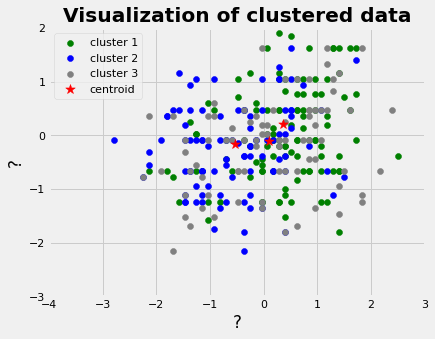

In [77]:
# Visualising the clusters
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std4[y_kmeans4 == 0, 0], X_std4[y_kmeans4 == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std4[y_kmeans4 == 1, 0], X_std4[y_kmeans4 == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(X_std4[y_kmeans4 == 2, 0], X_std4[y_kmeans4 == 2, 1],
            c='grey', label='cluster 3')
# plt.scatter(X_std4[kmeans4.labels_ == 3, 0], X_std4[kmeans4.labels_ == 3, 1],
#             c='magenta', label='cluster 4')
plt.scatter(centroids4[:, 0], centroids4[:, 1], marker='*', s=100,
            c='red', label='centroid')
plt.legend()
plt.xlim([-4, 3])
plt.ylim([-3, 2])
plt.xlabel('?')
plt.ylabel('?')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

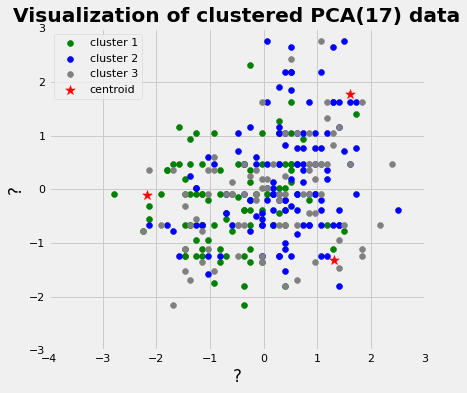

In [78]:
# Visualising the clusters with PCA 15
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(std_pca[kmeanspca.labels_ == 0, 0], std_pca[kmeanspca.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(std_pca[kmeanspca.labels_ == 1, 0], std_pca[kmeanspca.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(std_pca[kmeanspca.labels_ == 2, 0], std_pca[kmeanspca.labels_ == 2, 1],
            c='grey', label='cluster 3')
# plt.scatter(std_pca[kmeanspca.labels_ == 3, 0], std_pca[kmeanspca.labels_ == 3, 1],
#             c='magenta', label='cluster 4')
plt.scatter(centroidspca[:, 0], centroidspca[:, 1], marker='*', s=100,
            c='red', label='centroid')
plt.legend()
plt.xlim([-4, 3])
plt.ylim([-3, 3])
plt.xlabel('?')
plt.ylabel('?')
plt.title('Visualization of clustered PCA(17) data', fontweight='bold')
ax.set_aspect('equal');

In [79]:
X['clusters'] = pd.DataFrame(kmeans4.labels_).values
X.head()

,age,trestbps,chol,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,sex_0,sex_1,restecg_0,restecg_1,restecg_2,cluster_pca,clusters
0,63,145,233,150,0,2.3,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
1,37,130,250,187,0,3.5,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
2,41,130,204,172,0,1.4,0,0,1,0,...,0,0,1,1,0,1,0,0,2,2
3,56,120,236,178,0,0.8,0,0,1,0,...,0,0,1,0,1,0,1,0,0,1
4,57,120,354,163,1,0.6,0,1,0,0,...,0,0,1,1,0,0,1,0,2,2


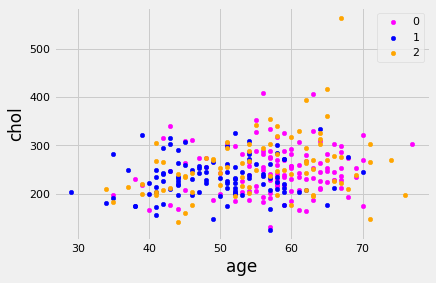

In [80]:
#data with cluster lables-- non-pca
fig, ax = plt.subplots()
colors = {0:'magenta', 1:'blue', 2:'orange', 3:'red', 4:'pink', 5:'yellow', 6:'purple', 7:'black', 8:'green'}
grouped = X.groupby('clusters')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='chol', label=key, color=colors[key])
plt.show()


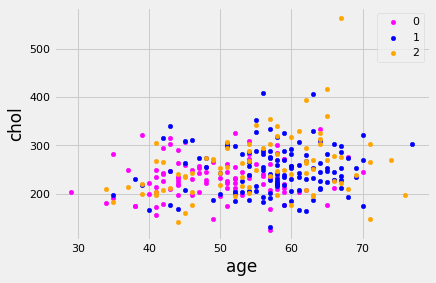

In [81]:
#pca data with cluster labels


fig, ax = plt.subplots()
colors = {0:'magenta', 1:'blue', 2:'orange', 3:'red', 4:'pink', 5:'yellow', 6:'purple', 7:'black', 8:'green'}
grouped = X_copy.groupby('cluster_pca')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='chol', label=key, color=colors[key])
plt.show()


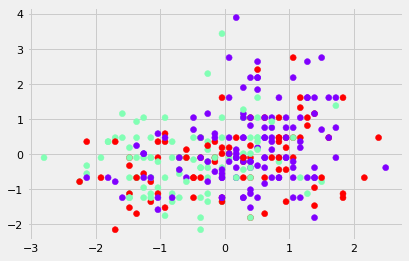

In [82]:
plt.scatter(X_std4[:, 0], X_std4[:, 1], c=kmeans4.labels_, cmap='rainbow')


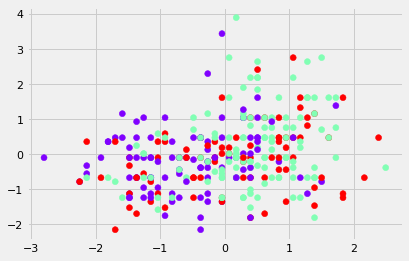

In [83]:
plt.scatter(std_pca[:, 0], std_pca[:, 1], c=kmeanspca.labels_, cmap='rainbow')

In [84]:
#try using a dataset with only continous numerical data
#create dataset
M = df_drop[['trestbps', 'oldpeak','thalach']] 
M.head(10)
#thalach: maximum heart rate achieved
#trestbps: resting blood pressure (in mm Hg on admission to the hospital)
#oldpeak = ST depression induced by exercise relative to rest

,trestbps,oldpeak,thalach
0,145,2.3,150
1,130,3.5,187
2,130,1.4,172
3,120,0.8,178
4,120,0.6,163
5,140,0.4,148
6,140,1.3,153
7,120,0.0,173
8,172,0.5,162
9,150,1.6,174


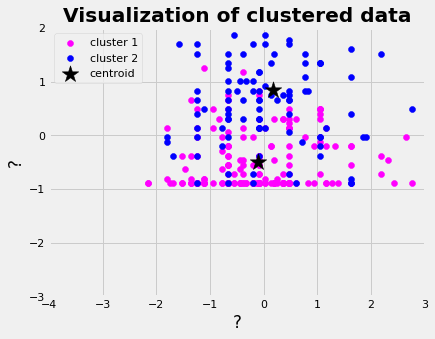

In [85]:
#standardize X
X_stdm = StandardScaler().fit_transform(M)
X_stdm

# Applying k-means to the dataset without PCA
kmeansm = KMeans(n_clusters=2, max_iter=1000, n_init=500, random_state=42) 
y_kmeansm = kmeansm.fit_predict(X_stdm)

centroidsm = kmeansm.cluster_centers_


#kmeans.labels_ are the same thing as y_means

# Visualising the clusters
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_stdm[y_kmeansm == 0, 0], X_stdm[y_kmeansm == 0, 1],
            c='magenta', label='cluster 1')
plt.scatter(X_stdm[y_kmeansm == 1, 0], X_stdm[y_kmeansm == 1, 1],
            c='blue', label='cluster 2')
#plt.scatter(X_stdm[y_kmeansm == 2, 0], X_stdm[y_kmeansm == 2, 1],
 #           c='grey', label='cluster 3')
#plt.scatter(X_stdm[kmeansm.labels_ == 3, 0], X_stdm[kmeansm.labels_ == 3, 1],
#            c='magenta', label='cluster 4')
plt.scatter(centroidsm[:, 0], centroidsm[:, 1], marker='*', s=300,
            c='black', label='centroid')
plt.legend()
plt.xlim([-4, 3])
plt.ylim([-3, 2])
plt.xlabel('?')
plt.ylabel('?')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [86]:
#create labels
df_drop['clustersm'] = pd.DataFrame(kmeansm.labels_).values
df_drop.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_3,slope_0,slope_1,slope_2,sex_0,sex_1,restecg_0,restecg_1,restecg_2,clustersm
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,1,1,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,0,1,1,0,1,0,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,0,1,0,1,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,1,1,0,0,1,0,0


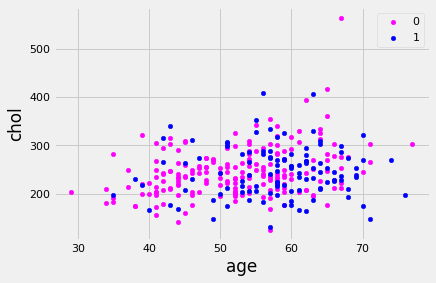

In [87]:
#data with cluster lables-- non-pca
fig, ax = plt.subplots()
colors = {0:'magenta', 1:'blue', 2:'orange', 3:'red', 4:'pink', 5:'yellow', 6:'purple', 7:'black', 8:'green'}
grouped = df_drop.groupby('clustersm')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x= 'age', y= 'chol', label=key, color=colors[key])
plt.show()


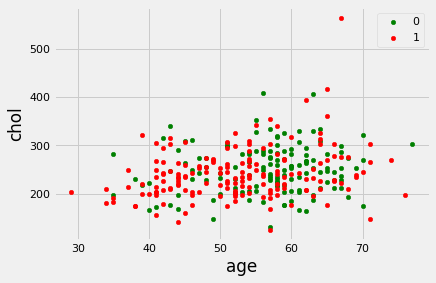

In [88]:
# diagnosis of heart disease (angiographic disease status)
# -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing

#check out the same data on the whole dataset that we have preped showing the target

fig, ax = plt.subplots()
colors = {0:'green', 1:'red'}
groups = df_copy.groupby('target')
for key, item in groups:
    item.plot(ax=ax, kind='scatter', x='age', y='chol', label=key, color=colors[key])
plt.show()

In [89]:
# Compare numeric diagnosis to clusters and get accuracy percentage
(~(df_copy['target'] == df_drop['clustersm'])).value_counts()[1]/df.shape[0]

0.7425742574257426

In [90]:
# Compare numeric diagnosis to clusters and get accuracy percentage
((df_copy['target'] == df_drop['clustersm'])).value_counts()[0]/df.shape[0]

0.7425742574257426

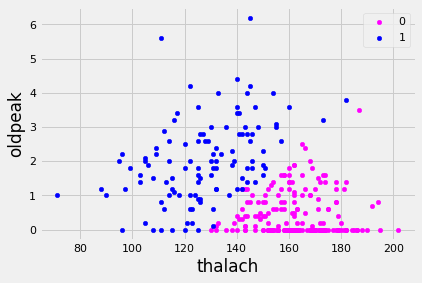

In [91]:
#data with cluster lables-- non-pca
fig, ax = plt.subplots()
colors = {0:'magenta', 1:'blue', 2:'orange', 3:'red', 4:'pink', 5:'yellow', 6:'purple', 7:'black', 8:'green'}
grouped = df_drop.groupby('clustersm')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x= 'thalach', y= 'oldpeak', label=key, color=colors[key])
plt.show()